# Huggingface counts 

In [20]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [9]:
html_text = requests.get('https://huggingface.co/languages').text

In [11]:
soup = BeautifulSoup(html_text, 'html.parser')


In [13]:
rows = soup.find_all('tr')

# Initialize lists to store data
languages = []
iso_codes = []
datasets_count = []
models_count = []

In [14]:
for row in rows:
    cells = row.find_all('td')
    if len(cells) > 0:  # Exclude header row
        languages.append(cells[0].get_text(strip=True))
        iso_codes.append(cells[1].find('code').get_text(strip=True))
        datasets_count.append(int(cells[2].get_text(strip=True).replace(',', '')))
        models_count.append(int(cells[3].get_text(strip=True).replace(',', '')))

In [17]:
df = pd.DataFrame({
    'Language': languages,
    'ISO Code': iso_codes,
    'Datasets Count': datasets_count,
    'Models Count': models_count
})

In [190]:
df.sort_values(by="Datasets Count", ascending=False).loc[:40]

,Language,ISO Code,Datasets Count,Models Count
0,EnglishEnglish,en,7757,33948
1,Chinese中文,zh,919,3489
2,FrenchFrançais,fr,822,3205
3,SpanishEspañol,es,645,2489
4,RussianРусский,ru,615,1749
5,GermanDeutsch,de,612,2635
6,Japanese日本語,ja,466,2051
7,PortuguesePortuguês,pt,457,1361
8,Korean한국어,ko,394,1875
9,Arabicاللغة العربية,ar,391,1227


In [192]:
datasets = df.sort_values(by="Datasets Count", ascending=False).loc[:, "Datasets Count"].values

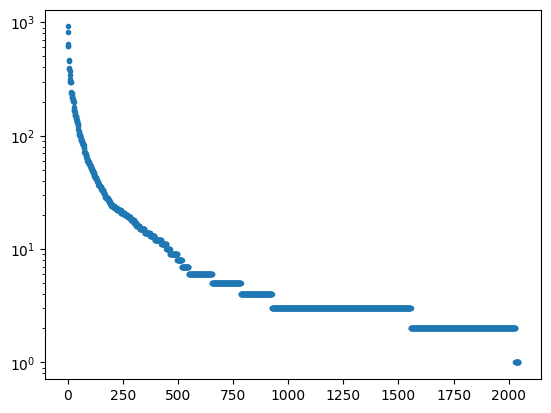

In [202]:
plt.semilogy(datasets[1:], ".")

In [21]:
n_of_speakers_data = pd.read_csv('/Users/giuliaocchini/Downloads/data.tsv', sep='\t')
glottolog_data = pd.read_csv('/Users/giuliaocchini/Downloads/languages_and_dialects_geo.csv')
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_49990/3733892100.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


In [80]:
huggingface_n_speakers_all = pd.merge(df, n_of_speakers_data, left_on = 'ISO Code', right_on = 'ISO 639 code', how = 'outer')

In [81]:
huggingface_n_speakers = huggingface_n_speakers_all.dropna(subset=['Language', 'Number of speakers (rounded)'])


In [126]:
huggingface_language_per_speaker = huggingface_n_speakers['Number of speakers (rounded)'].value_counts()

In [127]:
huggingface_language_per_speaker

Number of speakers (rounded)
10K-100K     474
<10K         464
200000       113
100000        65
1000000       63
            ... 
920000000      1
48000000       1
57000000       1
95000000       1
86000000       1
Name: count, Length: 74, dtype: int64

In [132]:
huggingface_language_per_speaker.index = huggingface_language_per_speaker.index.str.replace('<10K', '5000').str.replace('10K-100K', '50000').astype(int)

In [133]:
huggingface_language_per_speaker

Number of speakers (rounded)
50000        474
5000         464
200000       113
100000        65
1000000       63
            ... 
920000000      1
48000000       1
57000000       1
95000000       1
86000000       1
Name: count, Length: 74, dtype: int64

In [134]:
huggingface_language_per_speaker_sorted = huggingface_language_per_speaker.sort_index()

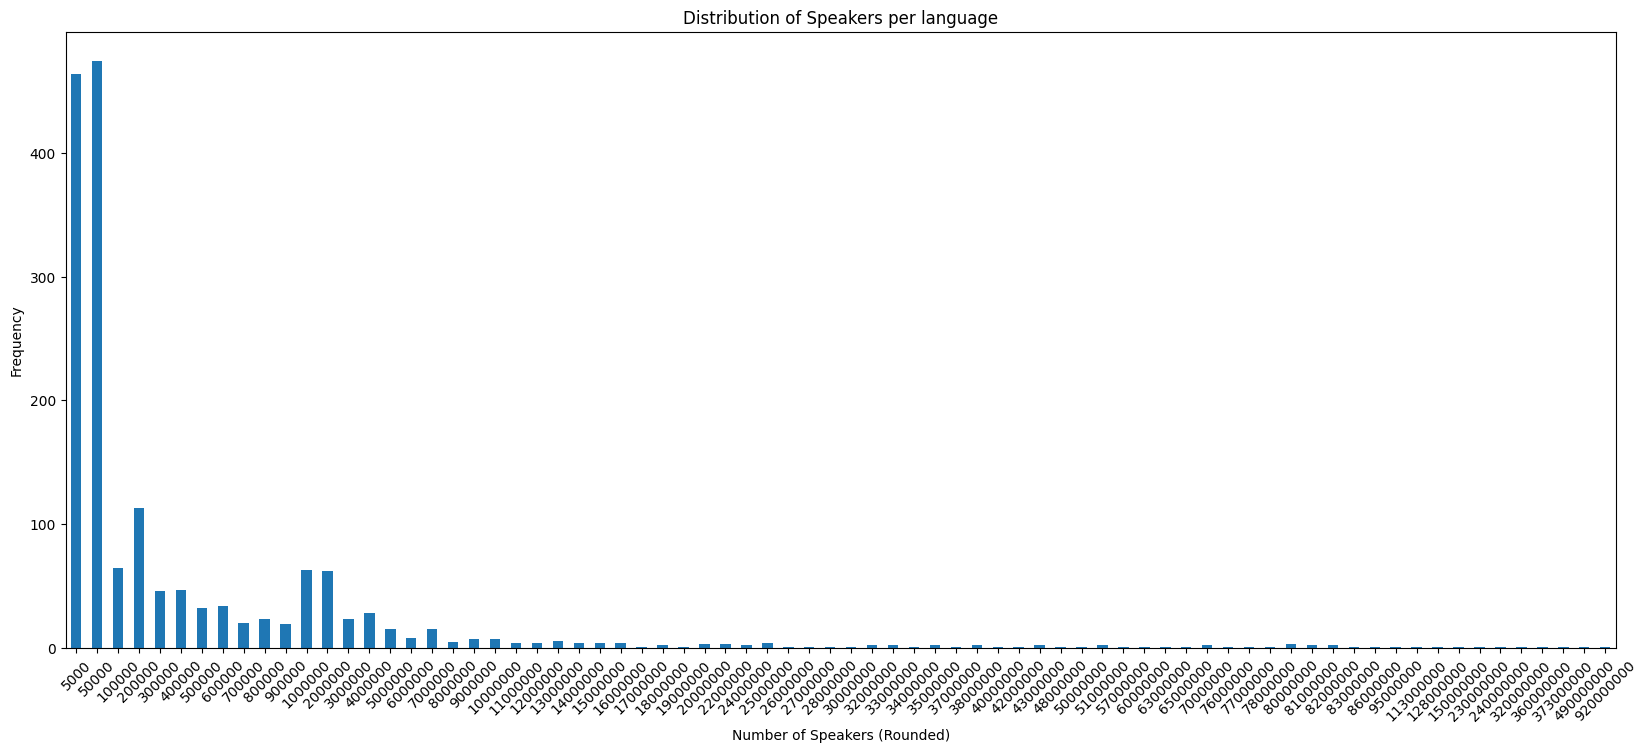

In [135]:
huggingface_language_per_speaker_sorted.plot(kind='bar', figsize=(20,8))
plt.xlabel('Number of Speakers (Rounded)')
plt.ylabel('Frequency')
plt.title('Distribution of Speakers per language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Not in huggingface, with speaker counts

In [204]:
n_speakers_no_huggingface = huggingface_n_speakers_all[huggingface_n_speakers_all['Language'].isna()]
n_speakers_no_huggingface_values = n_speakers_no_huggingface['Number of speakers (rounded)'].value_counts()
n_speakers_no_huggingface_values.index = n_speakers_no_huggingface_values.index.str.replace('<10K', '5000').str.replace('10K-100K', '50000').astype(int)
n_speakers_no_huggingface_values_sorted = n_speakers_no_huggingface_values.sort_index()
#there is some problem with the values here...
n_speakers_no_huggingface_values_sorted = n_speakers_no_huggingface_values_sorted[~n_speakers_no_huggingface_values_sorted.index.isin([10000, 80000])]
n_speakers_no_huggingface_values_sorted = n_speakers_no_huggingface_values_sorted[~((n_speakers_no_huggingface_values_sorted.index == 50000) & (n_speakers_no_huggingface_values_sorted.values == 1))]

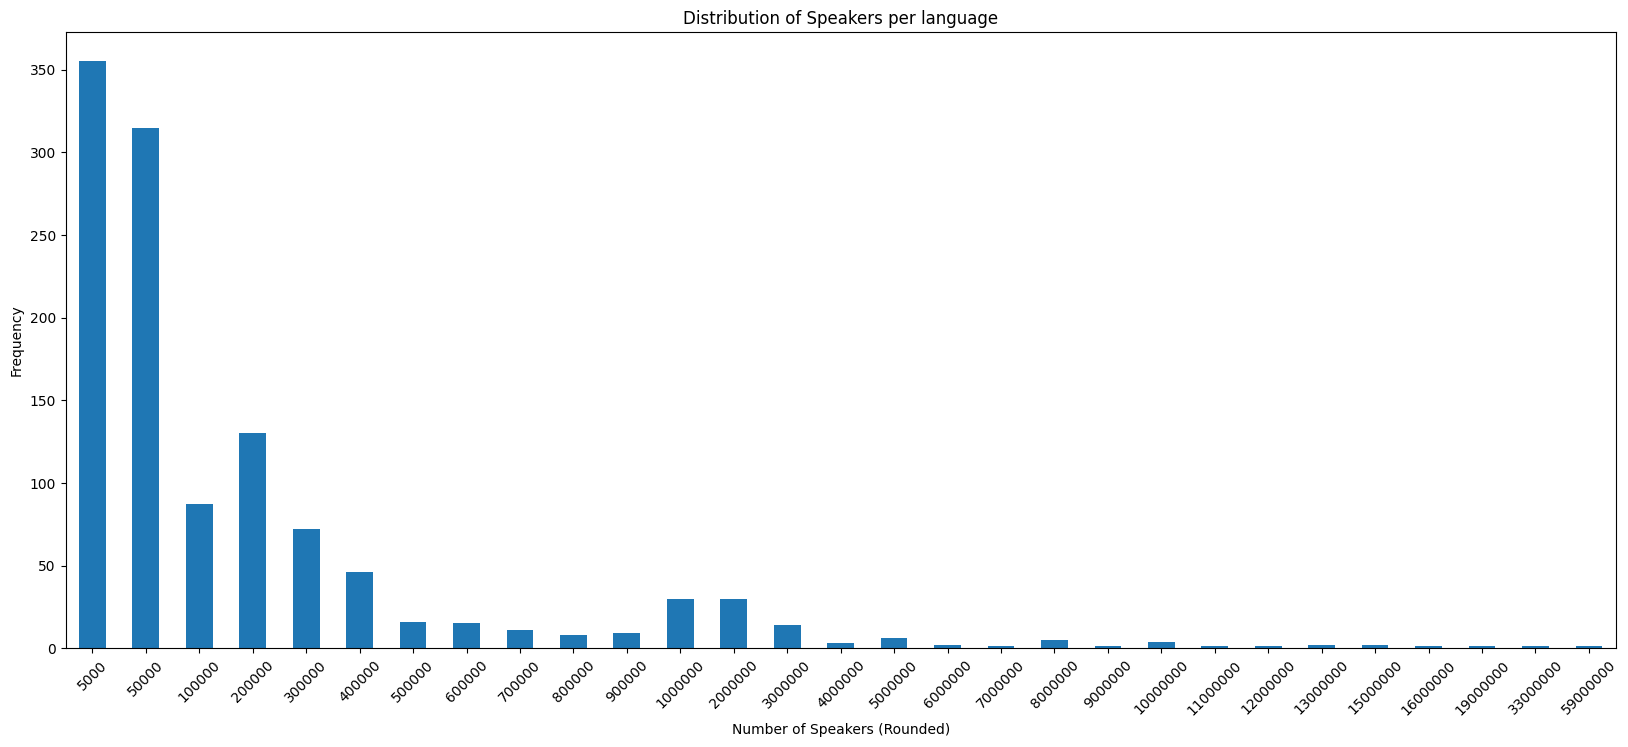

In [206]:
n_speakers_no_huggingface_values_sorted.plot(kind='bar', figsize=(20,8))
plt.xlabel('Number of Speakers (Rounded)')
plt.ylabel('Frequency')
plt.title('Distribution of Speakers per language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

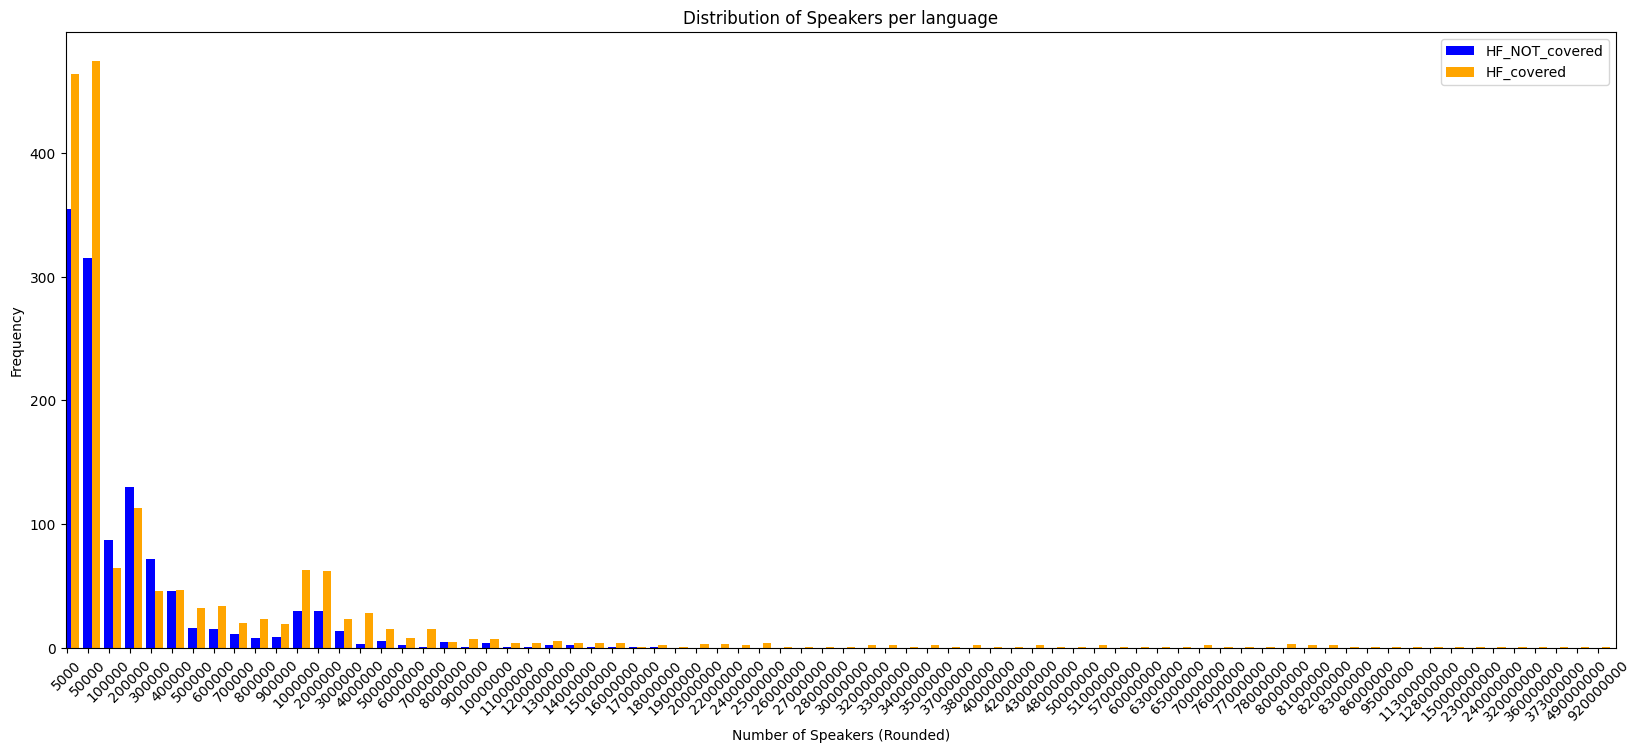

In [182]:
n_speakers_no_huggingface_values_sorted.plot(kind='bar', figsize=(20, 8), color='blue', position=0.5, width=0.4, label='HF_NOT_covered')

huggingface_language_per_speaker_sorted.plot(kind='bar', figsize=(20, 8), color='orange', position=-0.5, width=0.4, label='HF_covered')

plt.xlabel('Number of Speakers (Rounded)')
plt.ylabel('Frequency')
plt.title('Distribution of Speakers per language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

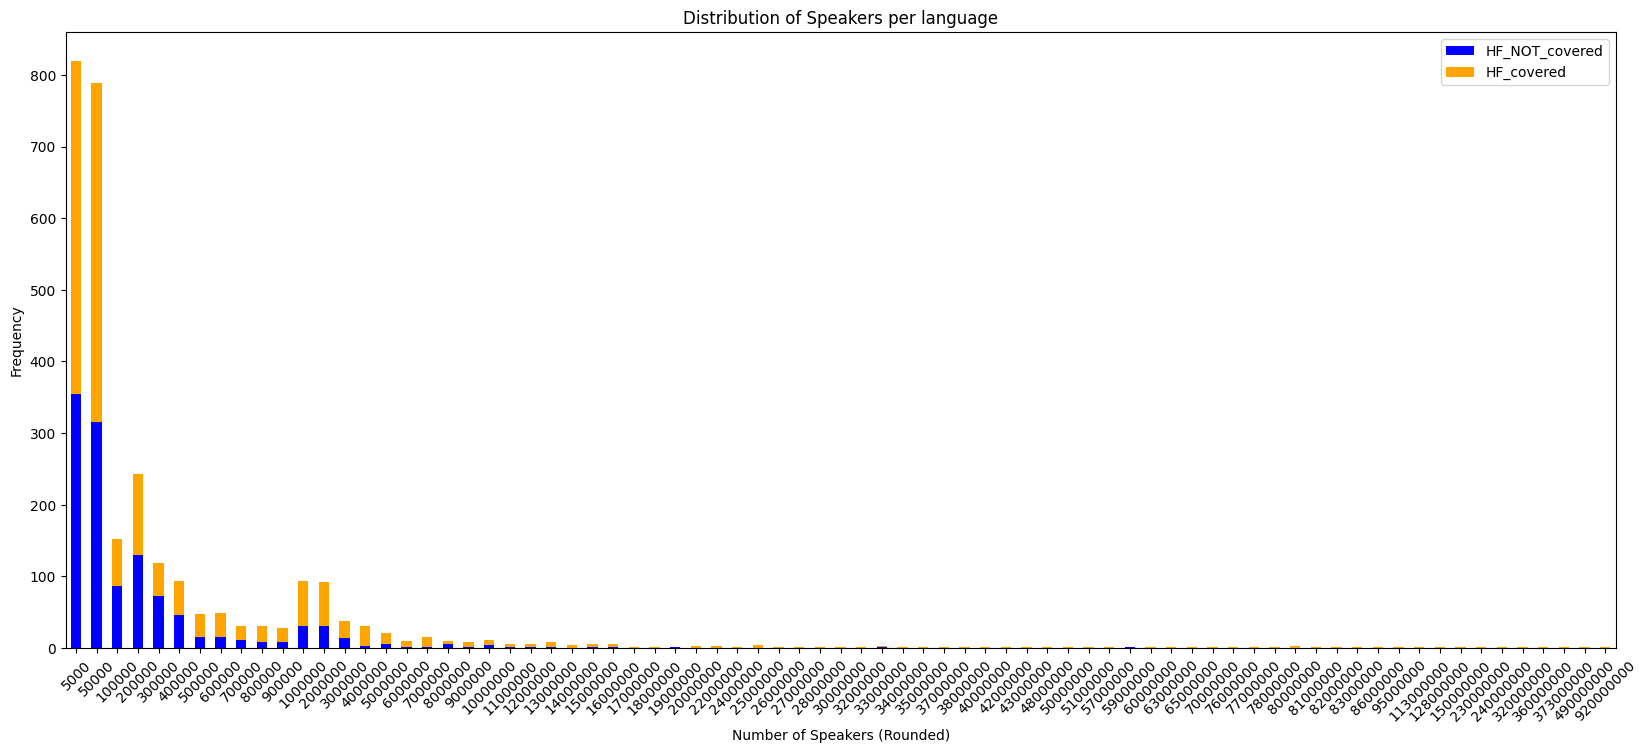

In [183]:
import matplotlib.pyplot as plt

# Assuming n_speakers_no_huggingface_values_sorted1 and n_speakers_no_huggingface_values_sorted2 are your Series objects containing the distributions

# Align the two series
aligned_series = n_speakers_no_huggingface_values_sorted.align(huggingface_language_per_speaker_sorted, fill_value=0)

# Plot histogram for the aligned distributions, stacking them
ax = aligned_series[0].plot(kind='bar', figsize=(20, 8), color='blue', label='HF_NOT_covered')
aligned_series[1].plot(kind='bar', color='orange', label='HF_covered', ax=ax, bottom=aligned_series[0])

plt.xlabel('Number of Speakers (Rounded)')
plt.ylabel('Frequency')
plt.title('Distribution of Speakers per language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Huggingface Coverage

In [208]:
huggingface_language_locaysh = pd.merge(df, glottolog_data, left_on = 'ISO Code', right_on = 'isocodes', how = 'outer')
huggingface_language_locaysh = huggingface_language_locaysh.dropna(subset=['ISO Code'])
huggingface_language_locaysh = huggingface_language_locaysh.dropna(subset=['latitude', 'longitude'])

In [215]:
huggingface_language_locaysh

,Language,ISO Code,Datasets Count,Models Count,glottocode,name,isocodes,level,macroarea,latitude,longitude
10,Ankave,aak,3.0,1.0,anka1246,Ankave,aak,language,Papunesia,-7.194440,145.754000
20,Abau,aau,3.0,1.0,abau1245,Abau,aau,language,Papunesia,-3.972220,141.324000
24,Amarasi,aaz,2.0,1.0,amar1273,Amarasi,aaz,language,Papunesia,-10.217510,123.963730
26,Abé,aba,2.0,1.0,abee1242,Abé,aba,language,Africa,5.596820,-4.384970
36,Abkhazian,abk,4.0,1.0,abkh1244,Abkhaz,abk,language,Eurasia,43.056218,41.159115
...,...,...,...,...,...,...,...,...,...,...,...
8331,Quioquitani-Quierí Zapotec,ztq,3.0,1.0,quio1241,Quioquitani-Quieri Zapotec,ztq,language,North America,16.341600,-96.155500
8336,Yatee Zapotec,zty,2.0,1.0,yate1242,Yatee Zapotec,zty,language,North America,17.288800,-96.198000
8339,Zulu,zul,22.0,31.0,zulu1248,Zulu,zul,language,Africa,-28.900000,30.200000
8345,Yongbei Zhuang,zyb,3.0,1.0,yong1276,Yongbei Zhuang,zyb,language,Eurasia,23.100000,108.150000


In [216]:
points = huggingface_language_locaysh.apply(lambda r: Point(r.longitude, r.latitude), axis=1)
gdb = geopandas.GeoDataFrame(huggingface_language_locaysh.assign(geometry=points), \
                        crs={'init' :'epsg:4326'})
xys = gdb['geometry'].apply(lambda pt: pd.Series({'x': pt.x, 'y': pt.y}))
gdb['x'] = xys['x']
gdb['y'] = xys['y']

/Users/giuliaocchini/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


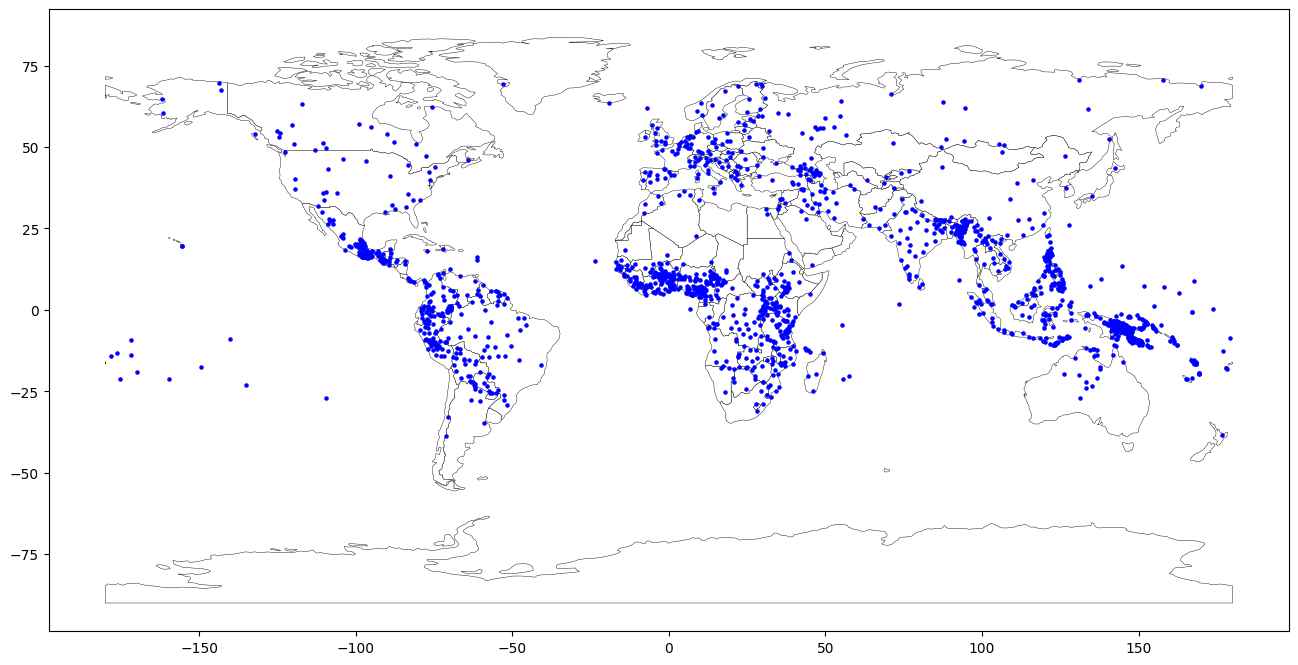

In [217]:
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="white", edgecolor = 'black',ax=ax, linewidth=0.3)
gdb.plot(ax=ax, color = 'blue', markersize = 5)
plt.show()

# Glottolog Coverage

In [218]:
glottolog_data_locays = glottolog_data.dropna(subset=['latitude', 'longitude'])
glottolog_data_locays = glottolog_data_locays[glottolog_data_locays['level'] != 'dialect']

In [220]:
points = glottolog_data_locays.apply(lambda r: Point(r.longitude, r.latitude), axis=1)
gdb = geopandas.GeoDataFrame(glottolog_data_locays.assign(geometry=points), \
                        crs={'init' :'epsg:4326'})
xys = gdb['geometry'].apply(lambda pt: pd.Series({'x': pt.x, 'y': pt.y}))
gdb['x'] = xys['x']
gdb['y'] = xys['y']

/Users/giuliaocchini/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


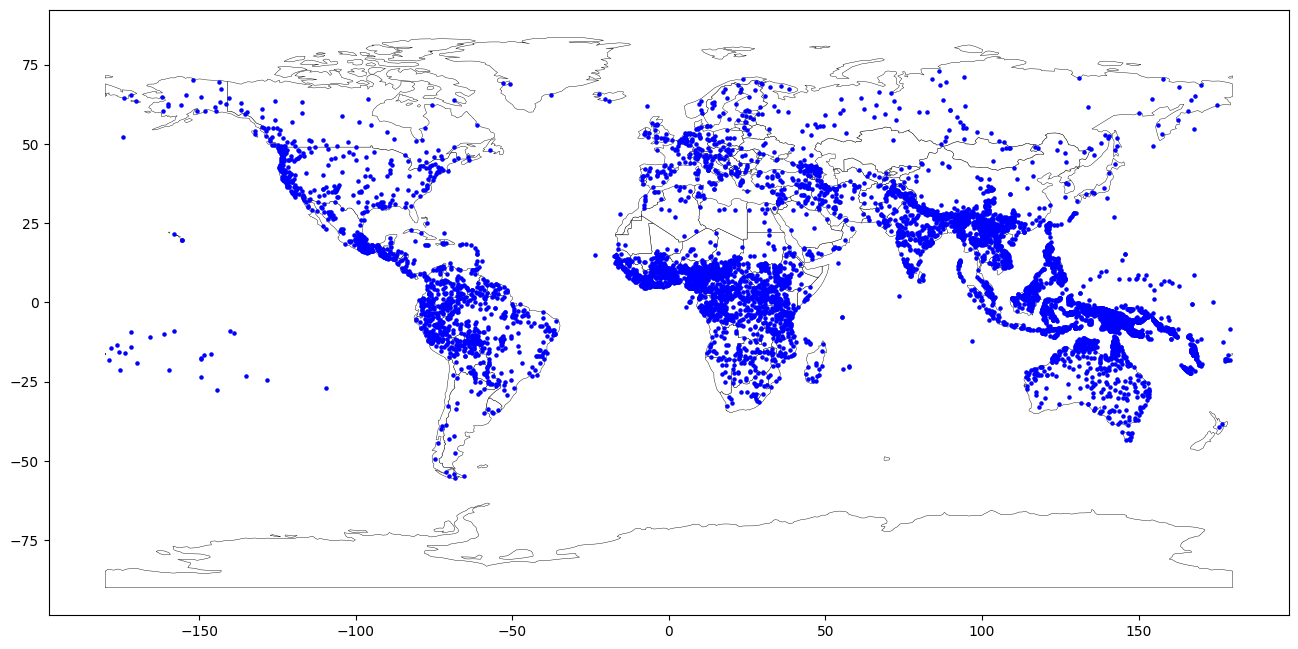

In [221]:
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="white", edgecolor = 'black',ax=ax, linewidth=0.3)
gdb.plot(ax=ax, color = 'blue', markersize = 5)
plt.show()